In [1]:
import os
import sys

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
src_dir = os.path.join(project_dir, 'src')
fig_dir = os.path.join(project_dir, 'fig')
data_dir = os.path.join(project_dir, 'data')
log_dir = os.path.join(project_dir, 'log')
os.makedirs(fig_dir, exist_ok=True)

# Add the src directory to sys.path
sys.path.append(src_dir)
import matplotlib.pyplot as plt
import numpy as np

import mech.full_DPSGD as DPSGDModule
from analysis.tradeoff_Gaussian import Gaussian_curve

In [2]:
model_name = 'resnet20'
database_size = 1000
epochs = 20
internal_result_path_dir = "/scratch/bell/wei402/fdp-estimation/results"

internal_result_path_prefix = os.path.join(internal_result_path_dir, model_name+'_'+str(database_size)+'_'+str(epochs))


data_args = {
    "method": "default",
    "data_dir": data_dir,
    "internal_result_path": os.path.join(internal_result_path_prefix, 'train')
}

args = DPSGDModule.generate_params(data_args=data_args, log_dir=log_dir, model_name=model_name, database_size=database_size, epochs=epochs, auditing_approach="1d_logit")

estimator_logit = DPSGDModule.DPSGD_PTLREstimator(args)
output = estimator_logit.build(eta_max = 15)
# Extract alpha and beta for plotting
alpha_logit = output["alpha"]
beta_logit = output["beta"]

Files already downloaded and verified


05/19/2025 08:43:25:INFO:Initialized resnet20_DPSGDSampler with parameters: batch_size=512, epochs=20, lr=0.10, sigma=1.00, max_grad_norm=1.00, device=cpu
05/19/2025 08:43:25:INFO:Need to generate 1000 samples.
05/19/2025 08:43:25:INFO:Found 1000 existing model pairs. Need to generate 0 more.



Loading and projecting models with 1 workers:


Generating samples:   0%|          | 0/20 [00:00<?, ?it/s]05/19/2025 08:43:27:INFO:Initialized resnet20_DPSGDSampler with parameters: batch_size=512, epochs=20, lr=0.10, sigma=1.00, max_grad_norm=1.00, device=cpu
/home/wei402/Desktop/fdp-estimation/src/mech/full_DPSGD.py:342: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any


Loading and projecting models with 1 workers:



Generating samples:   0%|          | 0/20 [00:00<?, ?it/s]05/19/2025 08:44:22:INFO:Initialized resnet20_DPSGDSampler with parameters: batch_size=512, epochs=20, lr=0.10, sigma=1.00, max_grad_norm=1.00, device=cpu
/home/wei402/Desktop/fdp-estimation/src/mech/full_DPSGD.py:342: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for an

In [3]:
args = DPSGDModule.generate_params(data_args=data_args, log_dir=log_dir, model_name=model_name, database_size=database_size, epochs=epochs, auditing_approach="1d_cross_entropy")

estimator_logit = DPSGDModule.DPSGD_PTLREstimator(args)
output = estimator_logit.build(eta_max = 15)
# Extract alpha and beta for plotting
alpha_cross_entropy = output["alpha"]
beta_cross_entropy = output["beta"]

Files already downloaded and verified


05/19/2025 09:03:16:INFO:Initialized resnet20_DPSGDSampler with parameters: batch_size=512, epochs=20, lr=0.10, sigma=1.00, max_grad_norm=1.00, device=cpu
05/19/2025 09:03:16:INFO:Found 1000 samples in /scratch/bell/wei402/fdp-estimation/results/resnet20_1000_20/train/samples_folder/samples_resnet20. Skipping generation.


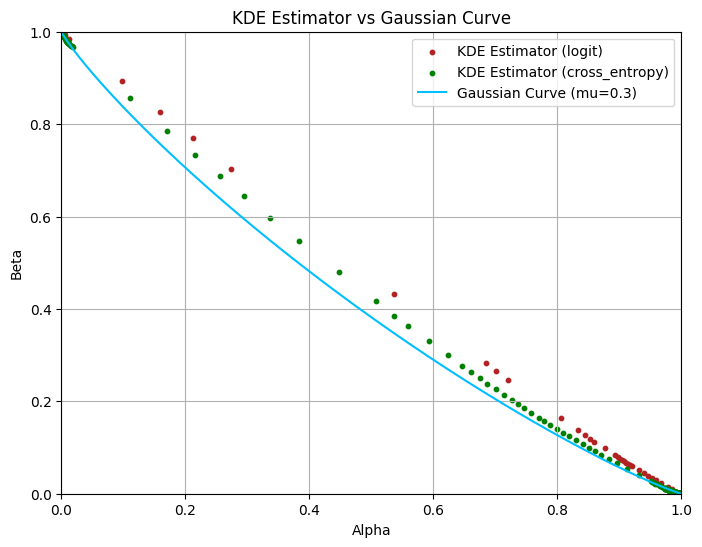

In [4]:
file_name = os.path.join(fig_dir, f"estimation_{model_name}_{database_size}.png")
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(alpha_logit, beta_logit, color="firebrick", s=10, label="KDE Estimator (logit)")
plt.scatter(alpha_cross_entropy, beta_cross_entropy, color="green", s=10, label="KDE Estimator (cross_entropy)")
alpha_values = np.linspace(0, 1, 1000)
plt.plot(alpha_values, Gaussian_curve(alpha_values, mean_difference = 0.3), color="deepskyblue", linewidth=1.5, label="Gaussian Curve (mu=0.3)")
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel("Alpha")
plt.ylabel("Beta")
plt.title("KDE Estimator vs Gaussian Curve")
plt.legend()
plt.grid()

# Save the plot
# plt.savefig(file_name, bbox_inches = 'tight', dpi = 300);
plt.show()